# Metrics for Regression

**Sum of Squared Error** is the main metric:

$$ \sum_j \left|f(X_{j \cdot}) - y_j\right|^2. $$

Unforunately, it tends to be susceptible to outliers.  In this case, **Absolute Error** can be better:

$$ \sum_j \left|f(X_{j \cdot}) - y_j\right|. $$

You've probably heard of **$R^2$** or the **Coefficient of Determination** in a linear regression context.  But it is actaully a very general idea: it measure the fraction of the error explained by the model $f$ versus the fraction of the error explained by a naive model that assumes the mean value of $y$, i.e. the variance of $y$:

$$ 1 - \dfrac{\sum_j \left|f(X_{j \cdot}) - y_j\right|^2}{\sum_j \left|\overline y - y_j\right|^2} \qquad \mbox{where} \qquad \overline y = \frac{1}{n}\sum_j y_j \,.$$

**Quiz 1:**

1. For a list of scalar values $z_1,\ldots,z_n$, the **mean** $\overline z$ is the quantity that minimizes the squared error:
$$ \overline z = \mbox{argmin}_z \sum_j \left|z - z_j\right|^2 $$
Do you know what quantity comes from minimizing the absolute error?
$$ \mbox{argmin}_z \sum_j \left|z - z_j\right| $$
Does this help explain why Absolute Error is less susceptible to outliers?
1. How does each of these metrics scale as you scale the labels ($y$'s) in our data set?

/Users/alexey/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


 Mean Absolute Error: 0.0901900155415
Mean Squared Error: 0.0113860437222
R^2: 0.993949604835


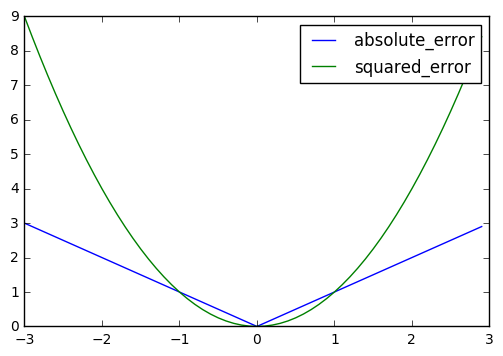

In [3]:
# Here are those metrics in scikit learn
import matplotlib
%matplotlib inline

from sklearn import metrics
from numpy import random
import pandas as pd
import numpy as np
import matplotlib.pylab as plt

random.seed(42)

y_obs  = 2*random.randn(10)
y_pred = y_obs + .1 * random.randn(10)

print "Mean Absolute Error:", metrics.mean_absolute_error(y_obs, y_pred)
print "Mean Squared Error:", metrics.mean_squared_error(y_obs, y_pred)
print "R^2:", metrics.r2_score(y_obs, y_pred)

# Plot mean-squared error
X = np.arange(-3,3,.1)
plt.plot(X,abs(X),label='absolute_error')
plt.plot(X, X**2,label='squared_error')
plt.legend()

# Metrics for Classificaton

There are a plethora of metrics for classification and they depend on whether the predictions are given in terms of the potential label classes or probabilities.

## Metrics for Class Predictions

Let's start with the simplest.

Recall this well-known table

|                     | Observation Positive     | Observation Negative    |
|---------------------|:------------------------:|:-----------------------:|
| Prediction Positive |     True Positive        | False Positive (Type I) |
| Prediction Negative | False Negative (Type II) |     True Negative       |

There are many summary statistics one can compute from this table:
1. The **Accuracy** gives the fraction labels correctly predicted (True Positives and True Negatives over everything).  
1. The **Hamming Loss** gives the fraction of labels incorrectly predicted.  It is 1 - Accuracy.
1. The **Precision** is true positives divided by all positive predictions 
1. The **Recall** is true positives divided by all positive observations.
1. There is also **F-beta** score which gives a weighted geometric average between the precision and recall (as a function of $\beta$) and the **F-1** score is the special case when $\beta = 1$.
1. The **Jaccard Similarity Coefficient** is the True positives divided by the sum of true positives, false negatives, and false positives. 

In [4]:
# Accuracy and Hamming distnace:

y_obs  = [0, 0, 1, 1, 0, 1, 0, 1]
y_pred = [0, 0, 1, 1, 0, 0, 0, 1]

print "Accuracy:", metrics.accuracy_score(y_obs, y_pred)
print "Hamming Loss:", metrics.hamming_loss(y_obs, y_pred)
print "Precision:", metrics.precision_score(y_obs, y_pred)
print "Recall:", metrics.recall_score(y_obs, y_pred)
print "F1:", metrics.f1_score(y_obs, y_pred)
print "Jaccard:", metrics.jaccard_similarity_score(y_obs, y_pred)

Accuracy: 0.875
Hamming Loss: 0.125
Precision: 1.0
Recall: 0.75
F1: 0.857142857143
Jaccard: 0.875


## Metrics for probabilistic predictions

### Precision-Recall Tradeoff

When the predictions are in terms of probabilities, we have a different set of metrics.  Then the above metrics are not well defined.  However, there is an implicit tradeoff between the two.

Let us take the two-class example where each $y_j$ is either positive (1) or negative (0) and we make a probabilistic prediction $p_j$.  A reasonable solution would be to choose a **threshold** $\underline p$ such that $p_j > \underline p$ is a Positive Prediciton and $p_j \le \underline p$ is a negative one.  Hence, for every choice of $p_j$, we can compute a precision and a recall.  Varying $\underline p$ creates a family (or curve) of Precision Recall pairs.

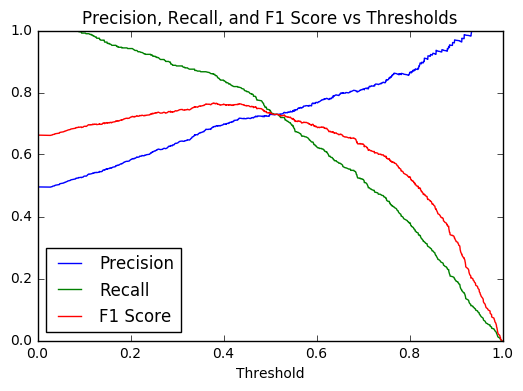

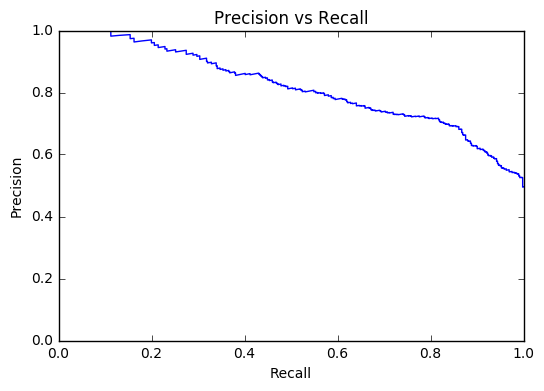

In [5]:
# Precision-Recall tradeoff

# generate predictions and observations
import numpy as np
random.seed(42)
y_pred = random.beta(1,1, size=1000)
y_obs  = np.array([random.binomial(1, p) for p in y_pred]) 

# compute the relevant stats
precisions, recalls, thresholds = metrics.precision_recall_curve(y_obs, y_pred)
thresholds = np.hstack([[0.], thresholds])  
f1s = 2 * (precisions * recalls) / (precisions + recalls)

# plots
from matplotlib import pylab as plt

fig = plt.figure()
plt.plot(thresholds, precisions, label='Precision')
plt.plot(thresholds, recalls, label='Recall')
plt.plot(thresholds, f1s, label='F1 Score')
plt.legend(loc='lower left')
plt.xlabel("Threshold"); plt.ylabel(" ")
plt.title("Precision, Recall, and F1 Score vs Thresholds")
    
fig = plt.figure()
plt.plot(recalls, precisions)
plt.xlim([0., 1.]); plt.ylim([0., 1.])
plt.xlabel("Recall"); plt.ylabel("Precision")
plt.title("Precision vs Recall")

Given that we have a precision and recall tradeoff for probabilistic estimators, we usually report statistics like "Precision at .6", which means "Precision when the threshold is set at Recall=.6" and vice versa for "Recall at .8".

**Quiz 2**:
1. There's a tradeoff between Precision and Recall.  When would you want a high precision process?  When would you want a high recall process?  Which would you use for Email Spam detection?  What about Drug approvals?

## Single-valued Probabilistic Prediction Metrics

While a modeller can decide the appropriate threshold once given a precision-recall curve, it is hard to optimzie for and it doesn't necessarily make sense to optimize for "Precision at .6" (why not "Precision at .7"?).  We need a single-valued metric that is independent of threshold.  Fortunately, there are two common ones:

1. The **Area under the Curve** or **AUC** computes the area under the Precision Recall curve.
1. There is a **Receiver Operating Charateristic**, which is similar to the Precision-Recall curve.  The area under this curve is itself a metric called **ROC-AUC**.  The definition isn't hard, but it's beyond the scope of this course.  You can find out more [on Wikipedia](https://en.wikipedia.org/wiki/Receiver_operating_characteristic)
1. The **Log-Loss** or **Entropy** is another characteristic.  It is related to the notion of Entropy in Thermodynamics and Shannon-Entropy.  For a binary class problem where $y_j$ is either $0$ or $1$, it is given by

$$ - \sum_j \left[y_j \log(p_j) + (1-y_j) \log(1-p_j)\right] $$

In [6]:
# AUC, ROC-AUC, Log-loss

# for entropy, we need the predictions and observations by-class
# e.g. two columns for a binomial prediction.
y_pred_full = np.vstack([y_pred, 1-y_pred]).T
y_obs_full = np.vstack([y_obs, 1-y_obs]).T

# You can compute AUC either via the AUC function by the average_precision_score
print "AUC by hand:", metrics.auc(recalls, precisions)
print "AUC:", metrics.average_precision_score(y_obs, y_pred)
print "ROC-AUC:", metrics.roc_auc_score(y_obs, y_pred)
print "Entropy:", metrics.log_loss(y_obs_full, y_pred_full)

AUC by hand: 0.817374315287
AUC: 0.817374315287
ROC-AUC: 0.823020441518
Entropy: 0.511646103944


<p> Continue to the next exercise [7_Overfitting.ipynb](7_Overfitting.ipynb)</p>

# Answers

## A1

1. Minimizing the absolute error finds the median.  Consider the "derivative" of $$\left|z - z_j\right| $$ with respect to $z$.  The median is less suceptible to outliers.  This gives some explanation of why (outliers have a linear, rather than quadratic effect).
1. $R^2$ is invariant to $y$, Absolute Error linearly, and MSE quadratically.

## A2

1. Increasing $\underline p$ increases precision and decreases recall.  Here, we are assuming that the estimator is halfway decent.
1. A perfect estimator would be a horizontal line across the top of the graph.  If it were guessing at random, it would be a horizontal line at the global rate of positive examples (precision at recall = 1.).
1. Using $1-f$ will result in an estimator that is below the line of a random estimator (i.e. it is strictly worse than just guessing).
1. We want a high precision process when the cost of a false positive is high.  We want a high recall process when the cost of a false negative is high.
1. You want a high precision Spam Detector (better to read a few extra spam emails then that email telling you about your promotion).
1. FDA Drug Approvals are very risk averse: they are looking for a high precision process.
